In [6]:
!pip install wordcloud

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
# Ganti path sesuai dengan file dataset kamu
df = pd.read_csv("indonesian_chat_cleaned_final.csv")

# Tampilkan informasi dan 5 data awal
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702 entries, 0 to 10701
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10702 non-null  int64 
 1   chat             10702 non-null  object
 2   label            10702 non-null  object
 3   cleaned_message  10702 non-null  object
dtypes: int64(1), object(3)
memory usage: 334.6+ KB


,id,chat,label,cleaned_message
0,1,main mu kek tai cok,violence,main mu kek tai cok
1,2,user telat ngasih tau elu edan sarap gue berga...,violence,telat ngasih tau elu edan sarap saya bergaul elu
2,3,kadang berfikir percaya tuhan jatuh berkalikal...,neutral,kadang berfikir percaya tuhan jatuh berkalikal...
3,4,user user aku\n\nku tau matamu sipit diliat,racist,akunku tau matamu sipit diliat
4,5,capek deh ketemu kaum cina kapir gini match,racist,capek deh ketemu kaum cina kapir gini match


In [9]:
# Ambil teks dan label
X = df["cleaned_message"]
y = df["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"🔹 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return accuracy_score(y_test, y_pred)


🔹 Model: Naive Bayes
Accuracy: 0.8094
Classification Report:
               precision    recall  f1-score   support

  harassment       0.89      0.87      0.88       471
     neutral       0.82      0.67      0.74       547
      racist       0.83      0.85      0.84       495
    violence       0.73      0.86      0.79       628

    accuracy                           0.81      2141
   macro avg       0.82      0.81      0.81      2141
weighted avg       0.81      0.81      0.81      2141



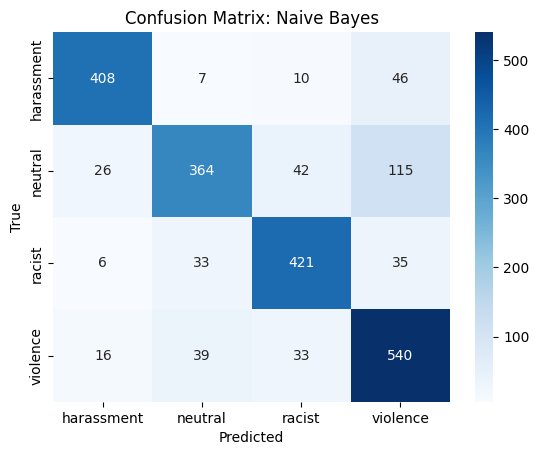

🔹 Model: SVM
Accuracy: 0.8379
Classification Report:
               precision    recall  f1-score   support

  harassment       0.92      0.88      0.90       471
     neutral       0.80      0.75      0.77       547
      racist       0.84      0.88      0.86       495
    violence       0.81      0.85      0.83       628

    accuracy                           0.84      2141
   macro avg       0.84      0.84      0.84      2141
weighted avg       0.84      0.84      0.84      2141



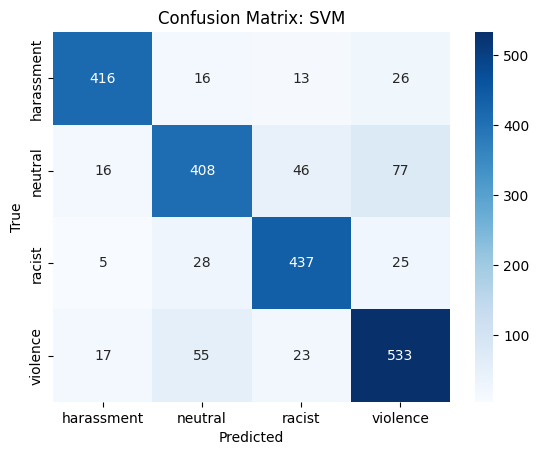

🔹 Model: Logistic Regression
Accuracy: 0.8160
Classification Report:
               precision    recall  f1-score   support

  harassment       0.91      0.87      0.89       471
     neutral       0.76      0.73      0.75       547
      racist       0.85      0.84      0.85       495
    violence       0.77      0.83      0.80       628

    accuracy                           0.82      2141
   macro avg       0.82      0.82      0.82      2141
weighted avg       0.82      0.82      0.82      2141



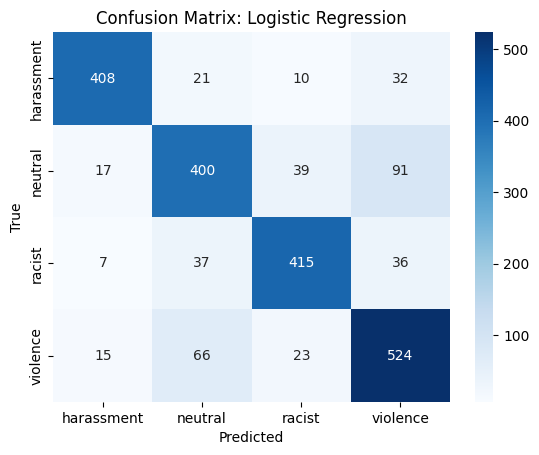

In [11]:
models = {
    "Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ]),
    "SVM": Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('clf', LinearSVC())
    ]),
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('clf', LogisticRegression(max_iter=1000))
    ])
}

results = {}
for name, model in models.items():
    acc = evaluate_model(model, name)
    results[name] = acc



/tmp/ipython-input-12-497848234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


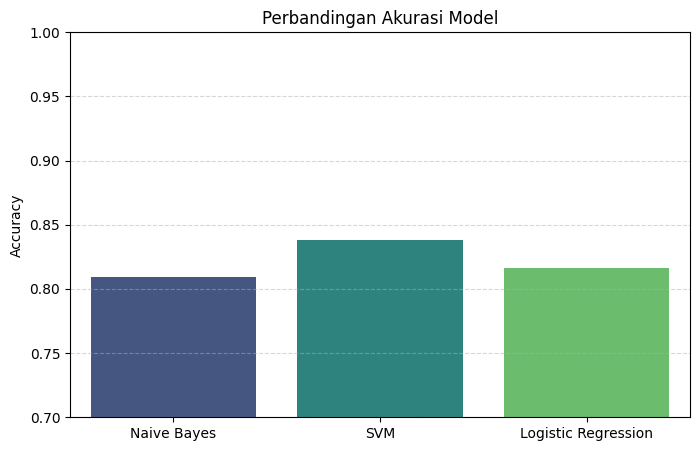

In [12]:
# Plot hasil akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



In [13]:
print(df["label"].unique())


['violence' 'neutral' 'racist' 'harassment']


In [14]:
def predicted(manual_texts, predicted_labels):
    # Buat DataFrame hasil
    result_df = pd.DataFrame({
        "Teks": manual_texts,
        "Prediksi": predicted_labels
    })

    # Hitung jumlah prediksi per label
    label_counts = result_df["Prediksi"].value_counts(normalize=True) * 100

    # Tampilkan
    print("\n📊 Distribusi Persentase Label:")
    print(label_counts.round(2).astype(str) + " %")

    # Visualisasi Pie Chart
    label_counts.plot.pie(autopct="%1.1f%%", figsize=(6, 6), title="Distribusi Prediksi Label")
    plt.ylabel("")  # hilangkan label sumbu Y
    plt.show()

In [15]:
manual_texts = [
    "woi tolol",
    "bisa lah ini",
    "dasar cina",
    "pasti jawa",
    "lu emang babi",
    "muka lu kaya kontol",
    "anjing lo",
    "apa kabar semua",
    "goblok banget sih lu",
    "hari ini indah banget ya"
]


1. Teks: 'woi tolol' → Prediksi: violence
2. Teks: 'bisa lah ini' → Prediksi: neutral
3. Teks: 'dasar cina' → Prediksi: racist
4. Teks: 'pasti jawa' → Prediksi: racist
5. Teks: 'lu emang babi' → Prediksi: violence
6. Teks: 'muka lu kaya kontol' → Prediksi: harassment
7. Teks: 'anjing lo' → Prediksi: violence
8. Teks: 'apa kabar semua' → Prediksi: neutral
9. Teks: 'goblok banget sih lu' → Prediksi: violence
10. Teks: 'hari ini indah banget ya' → Prediksi: neutral

📊 Distribusi Persentase Label:
Prediksi
violence      40.0 %
neutral       30.0 %
racist        20.0 %
harassment    10.0 %
Name: proportion, dtype: object


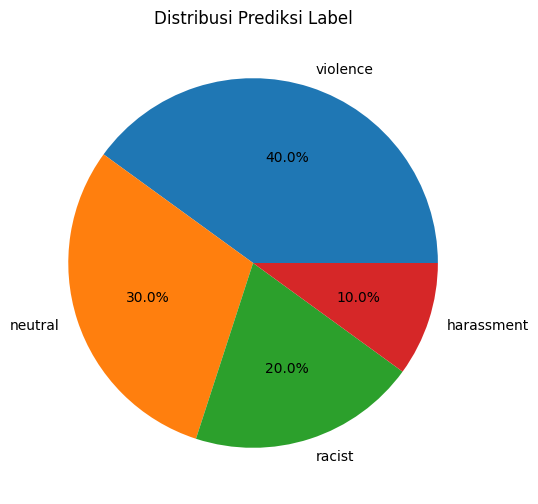

In [16]:
# Gunakan model terbaik (misalnya SVM)
best_model = models["SVM"]

# Prediksi label dari input
predicted_labels = best_model.predict(manual_texts)

# Tampilkan prediksi per teks
for i, (text, label) in enumerate(zip(manual_texts, predicted_labels), 1):
    print(f"{i}. Teks: '{text}' → Prediksi: {label}")

predicted(manual_texts, predicted_labels)

1. Teks: 'woi tolol' → Prediksi: violence
2. Teks: 'bisa lah ini' → Prediksi: neutral
3. Teks: 'dasar cina' → Prediksi: racist
4. Teks: 'pasti jawa' → Prediksi: racist
5. Teks: 'lu emang babi' → Prediksi: violence
6. Teks: 'muka lu kaya kontol' → Prediksi: harassment
7. Teks: 'anjing lo' → Prediksi: violence
8. Teks: 'apa kabar semua' → Prediksi: neutral
9. Teks: 'goblok banget sih lu' → Prediksi: violence
10. Teks: 'hari ini indah banget ya' → Prediksi: neutral

📊 Distribusi Persentase Label:
Prediksi
violence      40.0 %
neutral       30.0 %
racist        20.0 %
harassment    10.0 %
Name: proportion, dtype: object


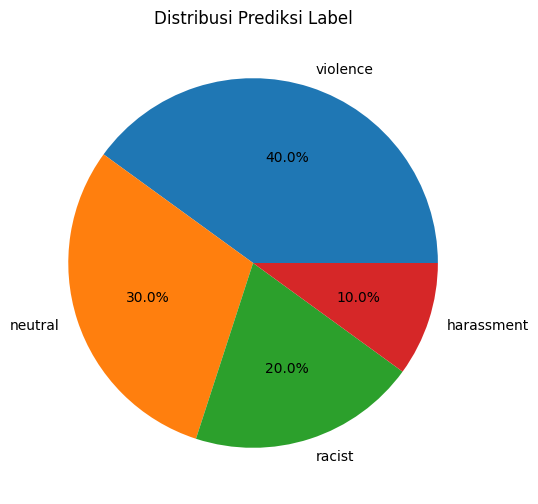

In [17]:
# Gunakan model terbaik (misalnya SVM)
best_model = models["Logistic Regression"]

# Prediksi label dari input
predicted_labels = best_model.predict(manual_texts)

# Tampilkan prediksi per teks
for i, (text, label) in enumerate(zip(manual_texts, predicted_labels), 1):
    print(f"{i}. Teks: '{text}' → Prediksi: {label}")

predicted(manual_texts, predicted_labels)

1. Teks: 'woi tolol' → Prediksi: violence
2. Teks: 'bisa lah ini' → Prediksi: violence
3. Teks: 'dasar cina' → Prediksi: racist
4. Teks: 'pasti jawa' → Prediksi: racist
5. Teks: 'lu emang babi' → Prediksi: violence
6. Teks: 'muka lu kaya kontol' → Prediksi: harassment
7. Teks: 'anjing lo' → Prediksi: violence
8. Teks: 'apa kabar semua' → Prediksi: violence
9. Teks: 'goblok banget sih lu' → Prediksi: violence
10. Teks: 'hari ini indah banget ya' → Prediksi: neutral

📊 Distribusi Persentase Label:
Prediksi
violence      60.0 %
racist        20.0 %
harassment    10.0 %
neutral       10.0 %
Name: proportion, dtype: object


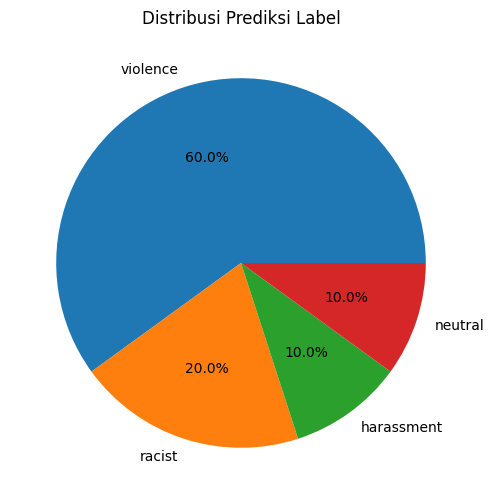

In [18]:
# Gunakan model terbaik (misalnya SVM)
best_model = models["Naive Bayes"]

# Prediksi label dari input
predicted_labels = best_model.predict(manual_texts)

# Tampilkan prediksi per teks
for i, (text, label) in enumerate(zip(manual_texts, predicted_labels), 1):
    print(f"{i}. Teks: '{text}' → Prediksi: {label}")
predicted(manual_texts, predicted_labels)

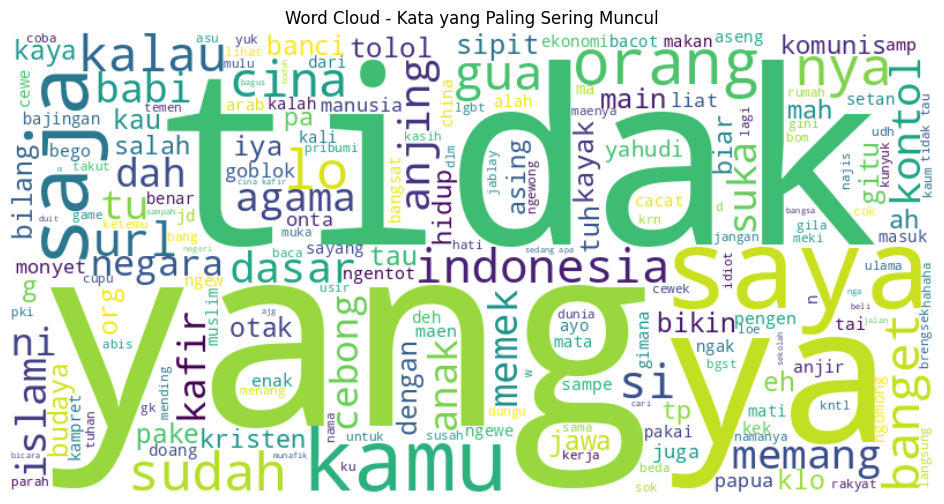

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks jadi satu string besar
all_text = " ".join(df["cleaned_message"].dropna())

# Buat word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(all_text)

# Tampilkan gambar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Kata yang Paling Sering Muncul")
plt.show()


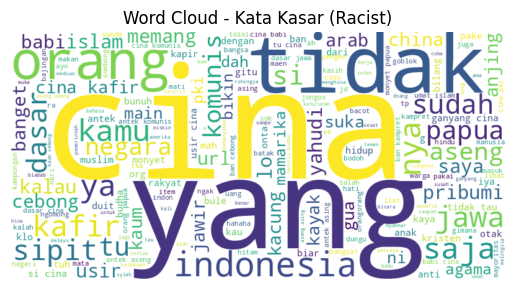

In [20]:
violence_text = " ".join(df[df["label"] == "racist"]["cleaned_message"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(violence_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Kata Kasar (Racist)")
plt.show()


In [21]:
import joblib

# Simpan model ke file
joblib.dump(models["SVM"], "svm_kata_kasar_model.pkl")

print("✅ Model SVM berhasil disimpan sebagai 'svm_kata_kasar_model.pkl'")


✅ Model SVM berhasil disimpan sebagai 'svm_kata_kasar_model.pkl'
